In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

Part 1

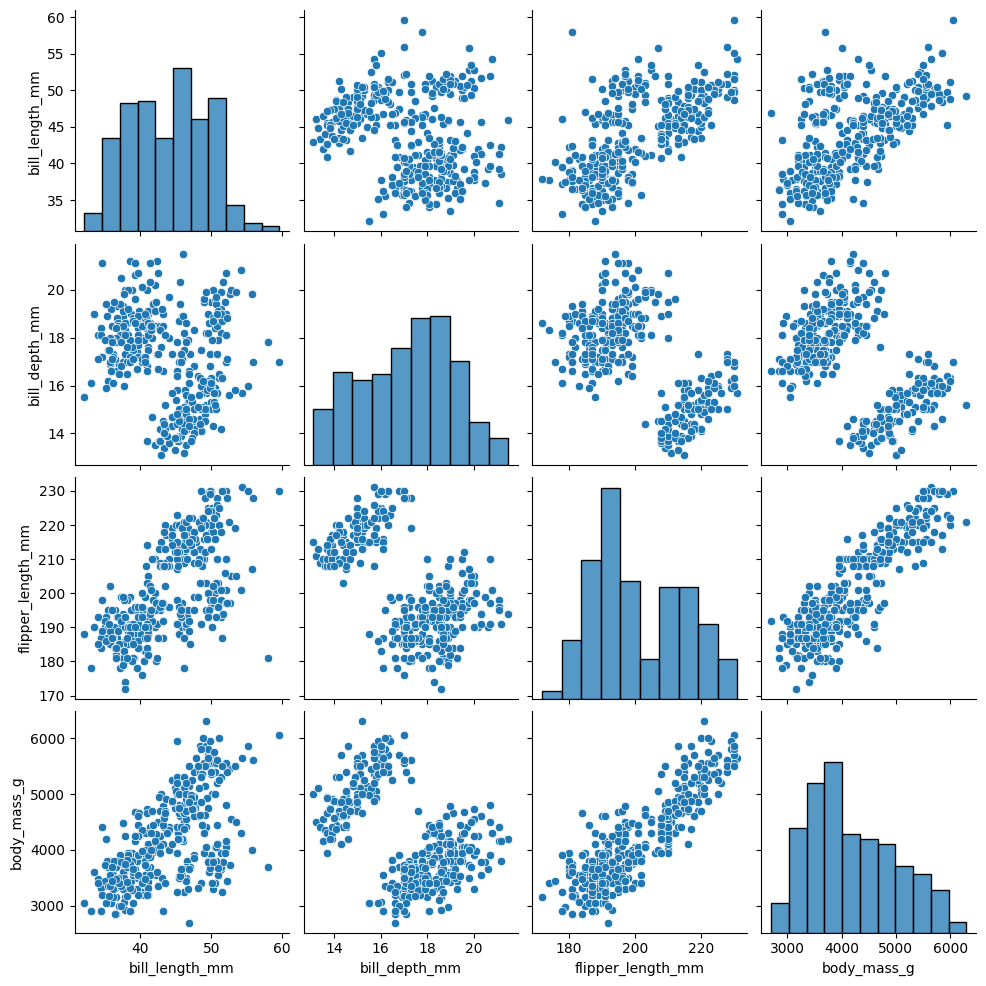

In [3]:
# Pair plot
penguins = sns.load_dataset('penguins')
sns.pairplot(penguins)

C:\Users\Monit\AppData\Local\Temp\ipykernel_25372\3061983943.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = penguins.corr()


<AxesSubplot: >

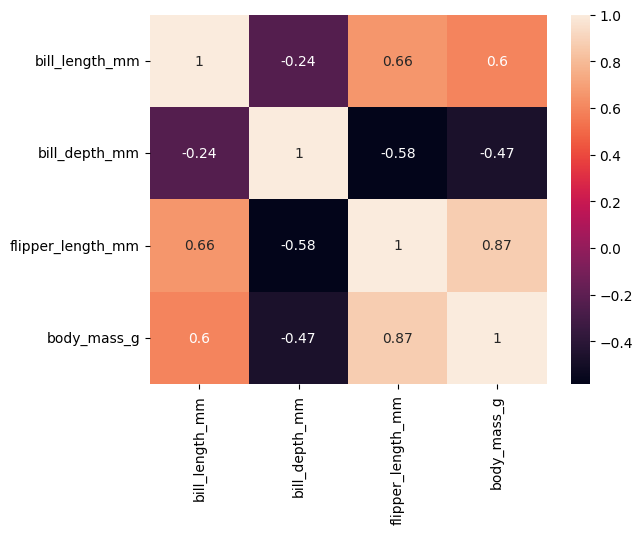

In [4]:
# Correlation matrix
corr = penguins.corr()
sns.heatmap(corr, annot=True)

Clearly visible correlations:
body mass to flipper lenght, where larger body mass clearly indicates longer flippers.
According to the Heatmap, 3 factors are correlated: Flipper lenght, body mass and bill lenght. It makes sense, as a larger penguin (weights more) would have a larger bill and larger flippers.

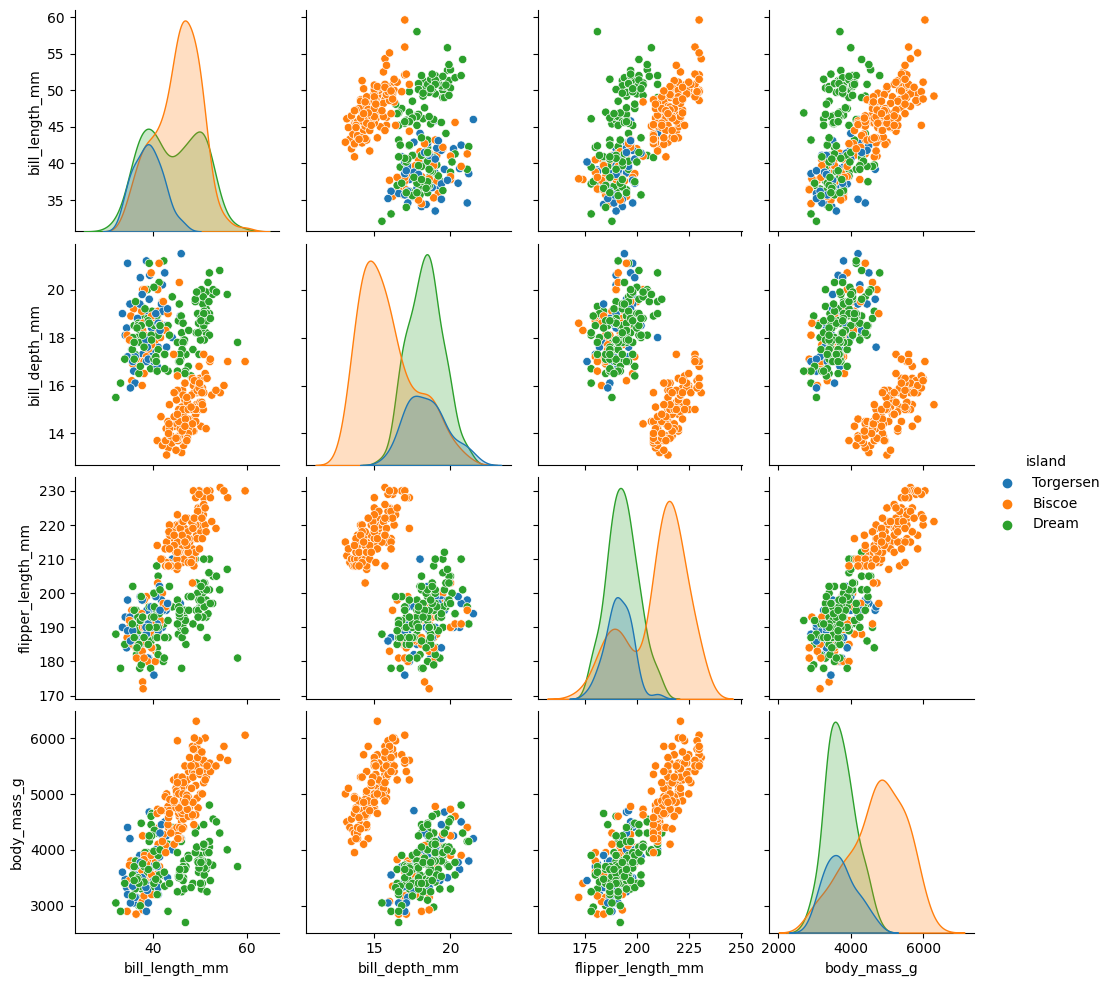

In [5]:
sns.pairplot(penguins, hue='island')

After adding hue, there are a few conclusions that can be drawn:

1. Dream and Torgersen have similar sized penguins, however, there are fewer penguins at Torgersen.
2. Biscoe has on average larger penguins, but with smaller bill depth

In [6]:
islands = penguins.value_counts('island')
islands

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

<AxesSubplot: xlabel='island'>

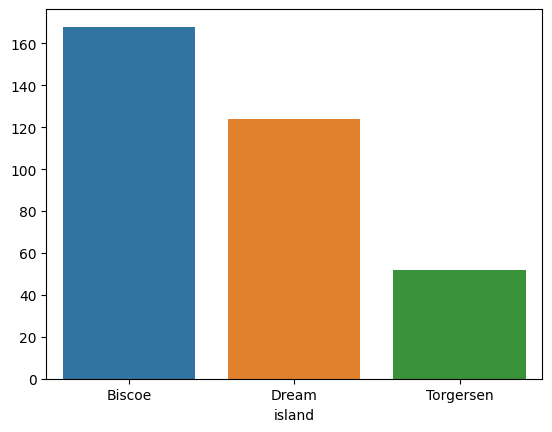

In [7]:
# Bar plot island counts
sns.barplot(x=islands.index, y=islands.values)

Torgersen has a much smaller sample size, and could be the "odd one out"

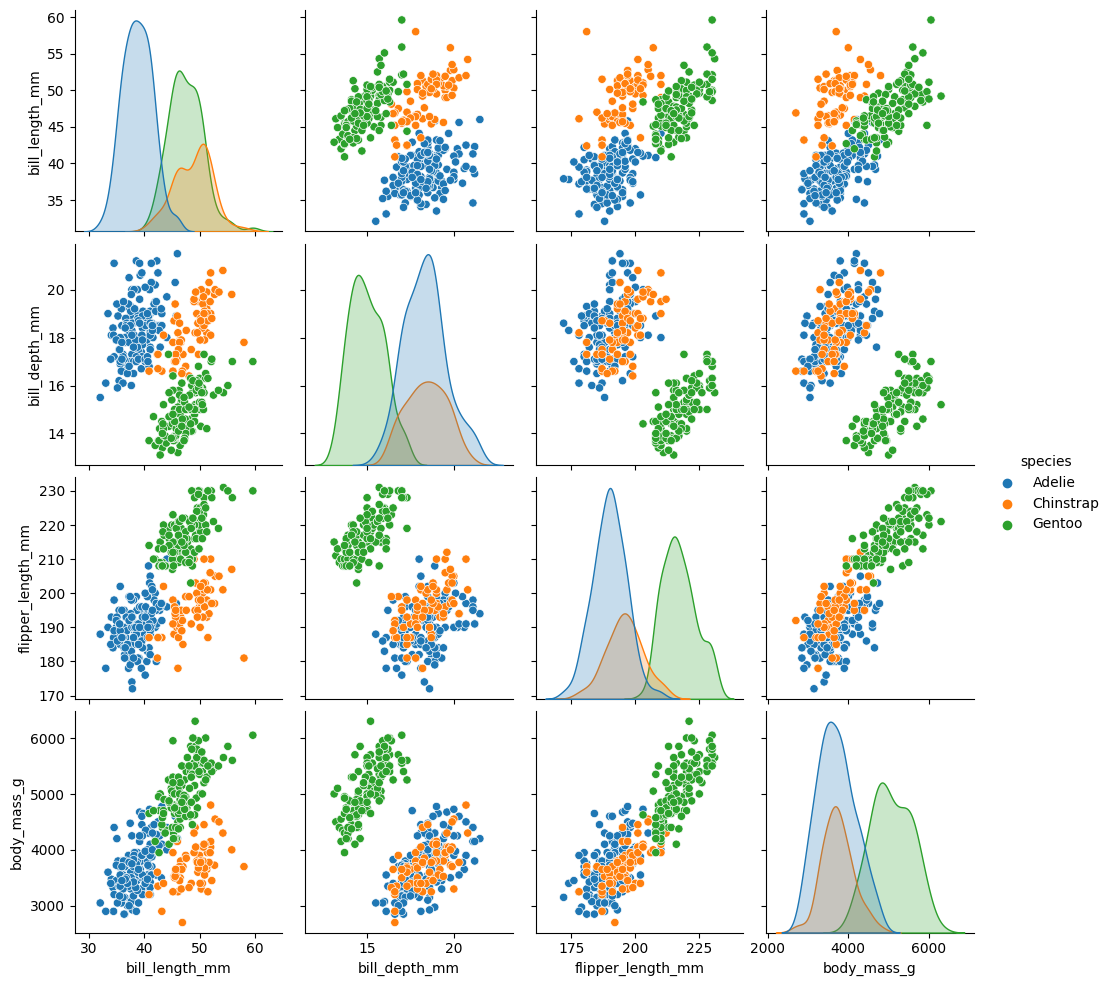

In [8]:
sns.pairplot(penguins, hue="species")

There are only slight visual differences when compared to the island hue, however there are clear groupings of each species in almost every category.

From this, it is fair to assume that different islands mostly have different species inhabiting them

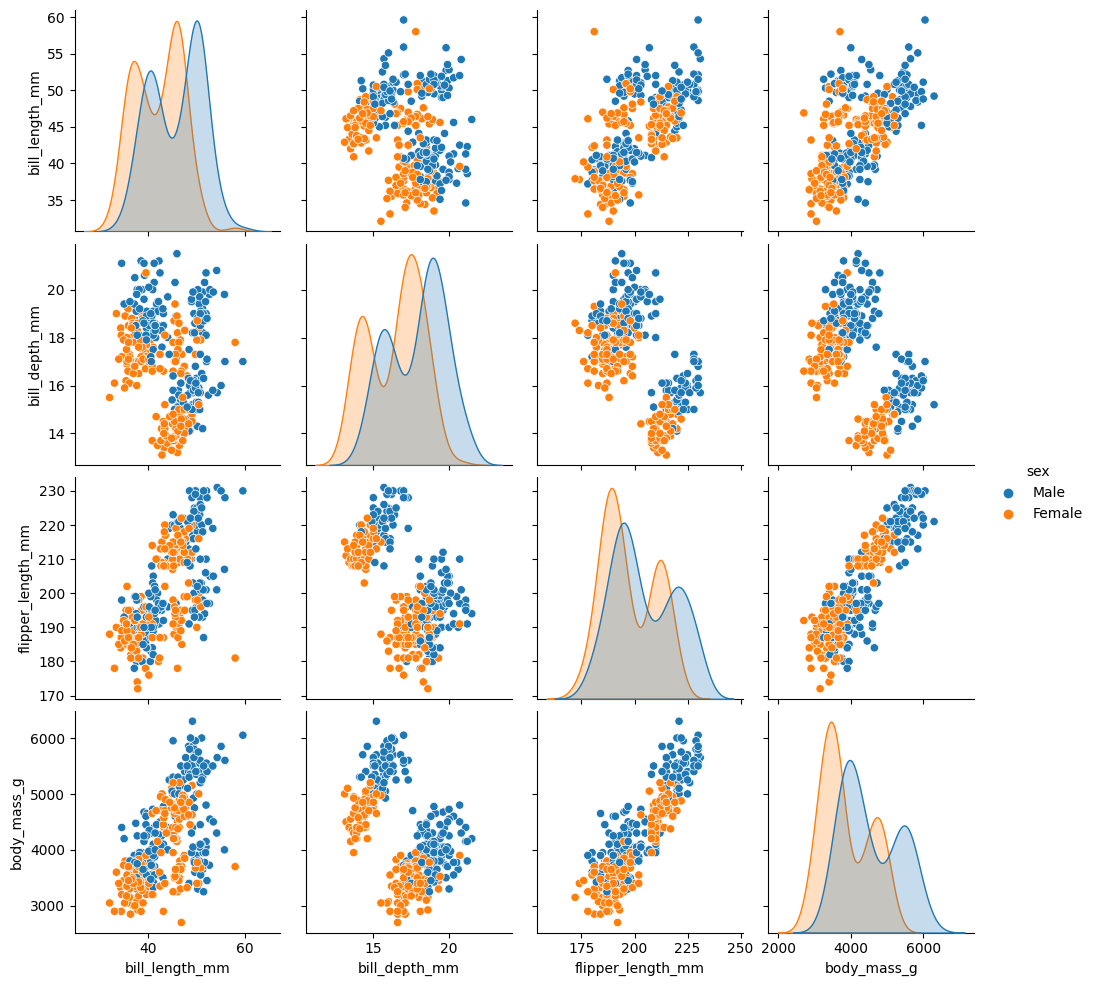

In [9]:
# lets see if the sex will have any difference
sns.pairplot(penguins, hue="sex")

When using the sex hue, it is clearly seen that on average the males are bigger than females. At the same time, the differences in groupings can be explained by the species. For example, Gentoo females are about the same size, or bigger than Adelie or Chinstrap males.

<AxesSubplot: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

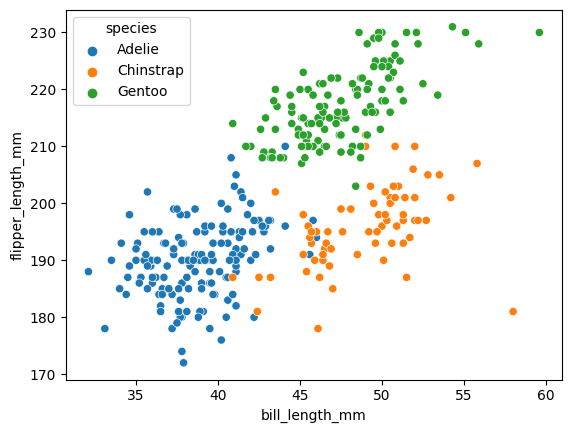

In [10]:
sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", data=penguins, hue="species")

<AxesSubplot: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

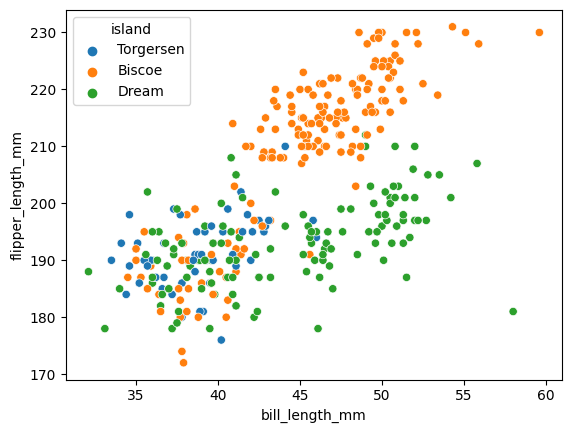

In [11]:
sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", data=penguins, hue="island")

The results are almost identical, as different species mostly live on different islands.

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

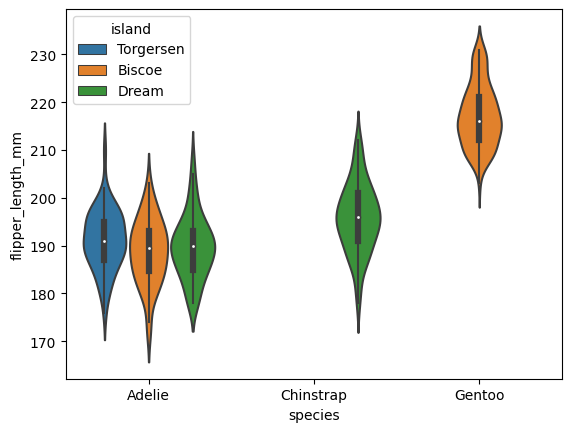

In [12]:
sns.violinplot(x="species", y="flipper_length_mm", data=penguins, hue="island")

<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

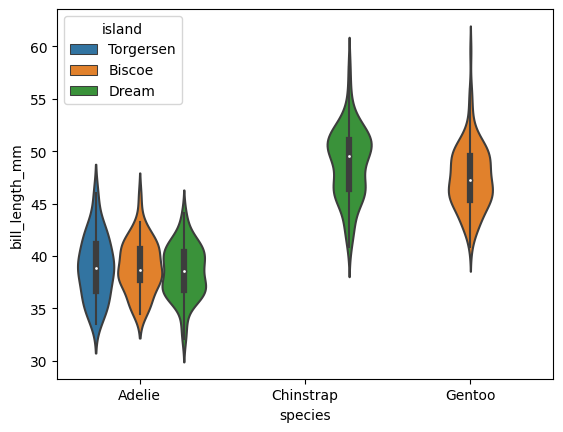

In [13]:
sns.violinplot(x="species", y="bill_length_mm", data=penguins, hue="island")

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

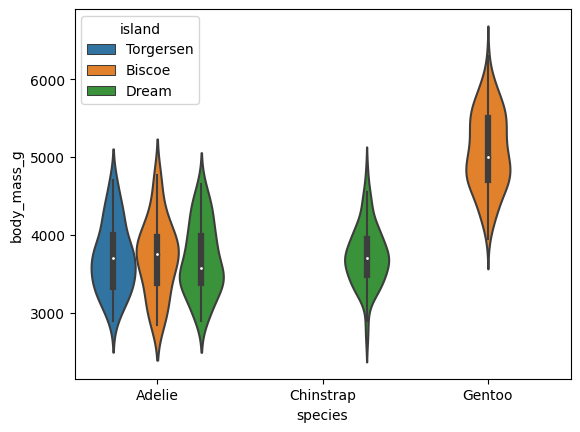

In [14]:
sns.violinplot(x="species", y="body_mass_g", data=penguins, hue="island")

The only new conclusion that I can draw from these plots, is that Chinstraps have, on average, the longest bills, while their weight is generally about the same as Adelie (the smalles species). They also have slightly longer flippers.

Part 2

In [15]:
mpg = sns.load_dataset('mpg')

In [16]:
# Let's convert mpg to L/100km and round the values.

mpg["liters_per_100km"] = (100 * 3.785411784) / (1.609344 * mpg["mpg"])
mpg["liters_per_100km"] = mpg["liters_per_100km"].round(2)

# Dropping the mpg and name columns

mpg = mpg.drop("mpg", axis=1)
mpg = mpg.drop("name", axis=1)

In [17]:
mpg.value_counts('origin')

origin
usa       249
japan      79
europe     70
dtype: int64

In [18]:
# Now, let's check the correlations and find the 2 columns that do not correlate
mpg.corr()

C:\Users\Monit\AppData\Local\Temp\ipykernel_25372\3196759753.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mpg.corr()


,cylinders,displacement,horsepower,weight,acceleration,model_year,liters_per_100km
cylinders,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,0.839271
displacement,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,0.866614
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.854798
weight,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,0.885204
acceleration,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,-0.455722
model_year,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,-0.557494
liters_per_100km,0.839271,0.866614,0.854798,0.885204,-0.455722,-0.557494,1.000000


In [19]:
# The columns are model_year and acceleration, let's remove them
mpg = mpg.drop('model_year', axis=1)
mpg = mpg.drop('acceleration', axis=1)

In [20]:
mpg.corr()

C:\Users\Monit\AppData\Local\Temp\ipykernel_25372\4096932258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mpg.corr()


,cylinders,displacement,horsepower,weight,liters_per_100km
cylinders,1.000000,0.950721,0.842983,0.896017,0.839271
displacement,0.950721,1.000000,0.897257,0.932824,0.866614
horsepower,0.842983,0.897257,1.000000,0.864538,0.854798
weight,0.896017,0.932824,0.864538,1.000000,0.885204
liters_per_100km,0.839271,0.866614,0.854798,0.885204,1.000000


Displacement has the strongest correlation with L/100km, therefore it is the best selection to indicate the efficiency

In [21]:
mpg = mpg.drop('cylinders', axis=1)
mpg = mpg.drop('horsepower', axis=1)
mpg

,displacement,weight,origin,liters_per_100km
0,307.0,3504,usa,13.07
1,350.0,3693,usa,15.68
2,318.0,3436,usa,13.07
3,304.0,3433,usa,14.70
4,302.0,3449,usa,13.84
...,...,...,...,...
393,140.0,2790,usa,8.71
394,97.0,2130,europe,5.35
395,135.0,2295,usa,7.35
396,120.0,2625,usa,8.40


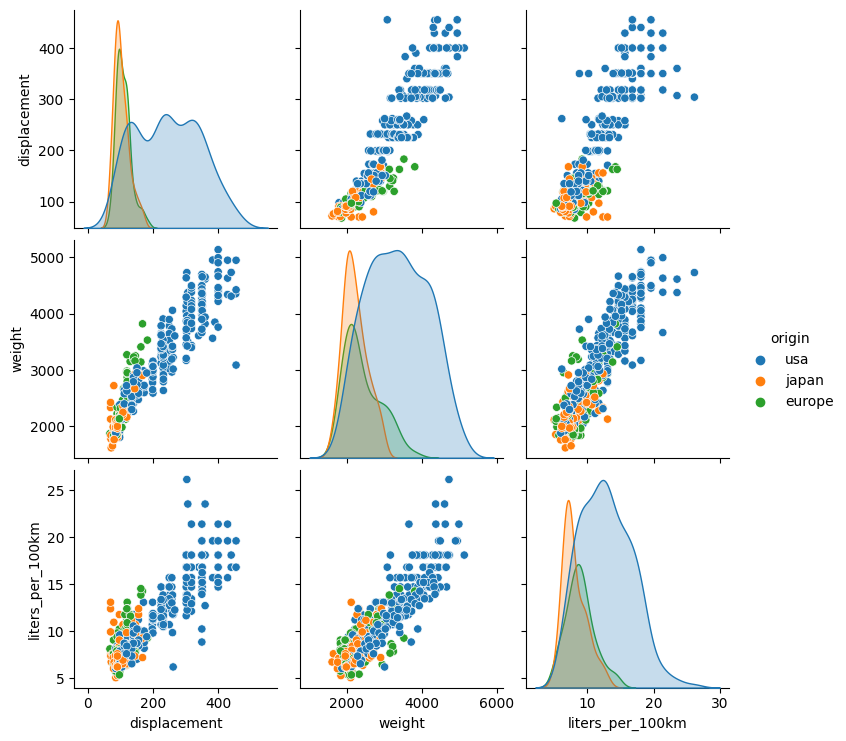

In [22]:
sns.pairplot(mpg, hue='origin')

USA cars tend to have the biggest fuel consumption.

It also seems that USA cars are heavier, which generally leads to bigger consumption.

At the same time, bigger displacement also shows bigger consumption (more powerful car = more consumption)

<AxesSubplot: xlabel='origin', ylabel='liters_per_100km'>

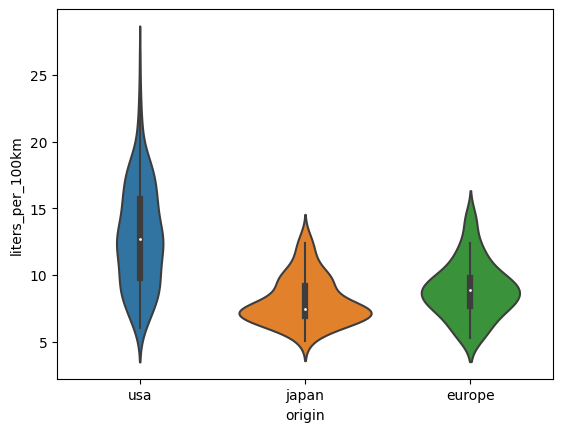

In [23]:
sns.violinplot(x='origin', y='liters_per_100km', data=mpg)

In [24]:
mpg.value_counts('origin')

origin
usa       249
japan      79
europe     70
dtype: int64

Generally, EU and Japan have lower consumption cars. However, there are a lot more cars from the USA, where the consumption distribution is fairly equal. 

Conclusion: Most of the cars in Japan and EU are more efficient, while USA cars come in wide variety, where it is possible to find any kind of car, be it low power and low consumption, or high power and high consumption

Part 3

In [38]:
gr = pd.read_csv('groceries.csv')
gr

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee
0,Oct-90,0.28,0.11,0.09,0.10,2.12,0.0049,0.28,0.29,0.58,0.0236,0.0571,2.5051,6.35,1.60,1.24
1,Nov-90,0.27,0.11,0.09,0.10,2.11,0.0049,0.34,0.33,0.56,0.0236,0.0558,2.4414,6.46,1.58,1.22
2,Dec-90,0.26,0.11,0.09,0.10,2.00,0.0046,0.32,0.35,0.55,0.0231,0.0562,2.3479,6.50,1.52,1.24
3,Jan-91,0.30,0.11,0.09,0.11,1.85,0.0042,0.34,0.35,0.57,0.0231,0.0571,2.6495,6.34,1.55,1.16
4,Feb-91,0.33,0.11,0.09,0.11,1.79,0.0042,0.33,0.34,0.60,0.0238,0.0602,2.3517,6.41,1.48,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,May-20,0.51,0.21,0.08,0.14,2.05,0.0053,0.83,0.58,NaN,0.0335,0.1120,NaN,NaN,1.97,1.42
356,Jun-20,0.52,0.20,0.08,0.15,2.05,0.0060,0.92,0.66,NaN,0.0346,0.1124,NaN,NaN,1.86,1.42
357,Jul-20,0.48,0.20,0.08,0.15,1.99,0.0060,0.89,0.69,NaN,0.0335,0.1036,NaN,NaN,1.78,1.49
358,Aug-20,0.50,0.20,0.08,0.15,1.30,0.0064,0.98,0.76,NaN,0.0331,0.1021,NaN,NaN,2.00,1.60


In [39]:
# Checking which columns have NaN values
gr.isna().any()

Month            False
Rice             False
Wheat            False
Barley           False
Corn             False
Peanuts          False
Sugar            False
Coconut-oil      False
Palm-oil         False
Sunflower-oil     True
Chicken          False
Beef             False
Pork              True
Fish              True
Tea              False
Coffee           False
dtype: bool

In [40]:
# Replacing the NaN values with average values
gr['Sunflower-oil'].fillna((gr['Sunflower-oil'].mean()), inplace=True)
gr['Pork'].fillna((gr['Pork'].mean()), inplace=True)
gr['Fish'].fillna((gr['Fish'].mean()), inplace=True)

In [41]:
# Checking for NaNs again
gr.isna().any()

Month            False
Rice             False
Wheat            False
Barley           False
Corn             False
Peanuts          False
Sugar            False
Coconut-oil      False
Palm-oil         False
Sunflower-oil    False
Chicken          False
Beef             False
Pork             False
Fish             False
Tea              False
Coffee           False
dtype: bool

In [42]:
# Converting the Month column
gr['Month'] = pd.to_datetime(gr['Month'], format='%b-%y')

# Extracting the Month and Year into their own columns
gr['Year'] = gr['Month'].dt.year
gr['Month'] = gr['Month'].dt.month

In [43]:
# Looking at correlations
gr.corr()

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee,Year
Month,1.000000,-0.044979,-0.013236,-0.030244,-0.044408,-0.001781,0.003578,-0.040258,-0.046552,-0.005825,-0.015935,0.006254,-0.049440,-0.080344,-0.030672,-0.000688,-0.037605
Rice,-0.044979,1.000000,0.764992,0.725854,0.820150,0.696030,0.704375,0.646414,0.793909,-0.082812,0.652289,0.616056,0.348913,0.473308,0.643568,0.567478,0.599948
Wheat,-0.013236,0.764992,1.000000,0.892162,0.890443,0.580613,0.640290,0.618246,0.822121,-0.063324,0.646178,0.528809,0.398452,0.407069,0.477763,0.547567,0.521170
Barley,-0.030244,0.725854,0.892162,1.000000,0.907648,0.609116,0.620424,0.529652,0.792855,-0.025409,0.619077,0.432840,0.386439,0.296844,0.507331,0.448200,0.485134
Corn,-0.044408,0.820150,0.890443,0.907648,1.000000,0.710431,0.755538,0.680974,0.837823,0.007242,0.678824,0.615079,0.479255,0.466458,0.631756,0.562999,0.570409
Peanuts,-0.001781,0.696030,0.580613,0.609116,0.710431,1.000000,0.611945,0.603114,0.684083,-0.155459,0.498765,0.628254,0.439308,0.393605,0.549859,0.420156,0.511999
Sugar,0.003578,0.704375,0.640290,0.620424,0.755538,0.611945,1.000000,0.691739,0.761629,-0.078173,0.564009,0.566042,0.376719,0.607986,0.673708,0.584662,0.514721
Coconut-oil,-0.040258,0.646414,0.618246,0.529652,0.680974,0.603114,0.691739,1.000000,0.835128,0.007093,0.659971,0.662576,0.276655,0.608828,0.662326,0.612844,0.646190
Palm-oil,-0.046552,0.793909,0.822121,0.792855,0.837823,0.684083,0.761629,0.835128,1.000000,-0.086490,0.645418,0.560498,0.278544,0.506403,0.620940,0.709686,0.574697
Sunflower-oil,-0.005825,-0.082812,-0.063324,-0.025409,0.007242,-0.155459,-0.078173,0.007093,-0.086490,1.000000,0.042563,-0.172918,0.024800,-0.310311,0.005189,-0.095457,0.046572


<AxesSubplot: >

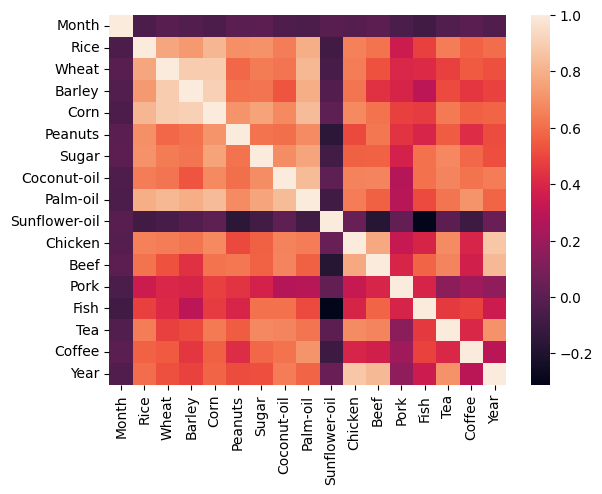

In [46]:
# Correlation heatmap
sns.heatmap(gr.corr())

It looks like the Sunflower Oil does not follow the price of other groceries

Wheat, Barley and Corn correlate with one another, which makes sense because those are crops that grow under roughly similar conditions. At the same time, palm oil also correlates well with these crops

The same can be said about chicken and beef, as those are livestock. Interestinly, Pork does not correlate well with neigher of them.

Advanced
Ex. 2

In [58]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [59]:
# Start by checking which rows have NaN values
titanic.isna().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

After looking at the data in Data Viewer, there are a few columns that can be dropped.

1. embarked and embark_town are essentially the same info, therefore embarked will be dropped.
2. adult_male is also useless, as "who" is providing the same information, and more.
3. deck has mostly NaN data, without any option to fill in the empty cells, therefore it should be dropped.
4. alive does not contain relevant information, as there is a "survived" column. (We are looking for features of people who survived, not who are alive at the moment)
5. class and pclass contain the same information, dropping the "class" column
6. who can be dropped as well, as there are columns 'sex' and 'age'

In [60]:
titanic = titanic.drop("embarked", axis=1)
titanic = titanic.drop("adult_male", axis=1)
titanic = titanic.drop("deck", axis=1)
titanic = titanic.drop("alive", axis=1)
titanic = titanic.drop("class", axis=1)
titanic = titanic.drop("who", axis=1)

<AxesSubplot: xlabel='survived', ylabel='age'>

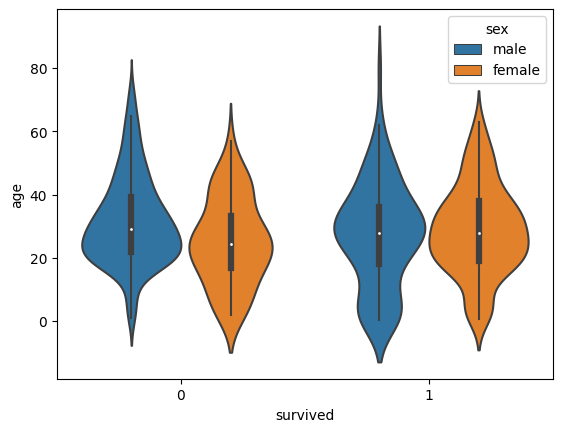

In [61]:
sns.violinplot(x='survived', y='age', hue='sex', data=titanic)

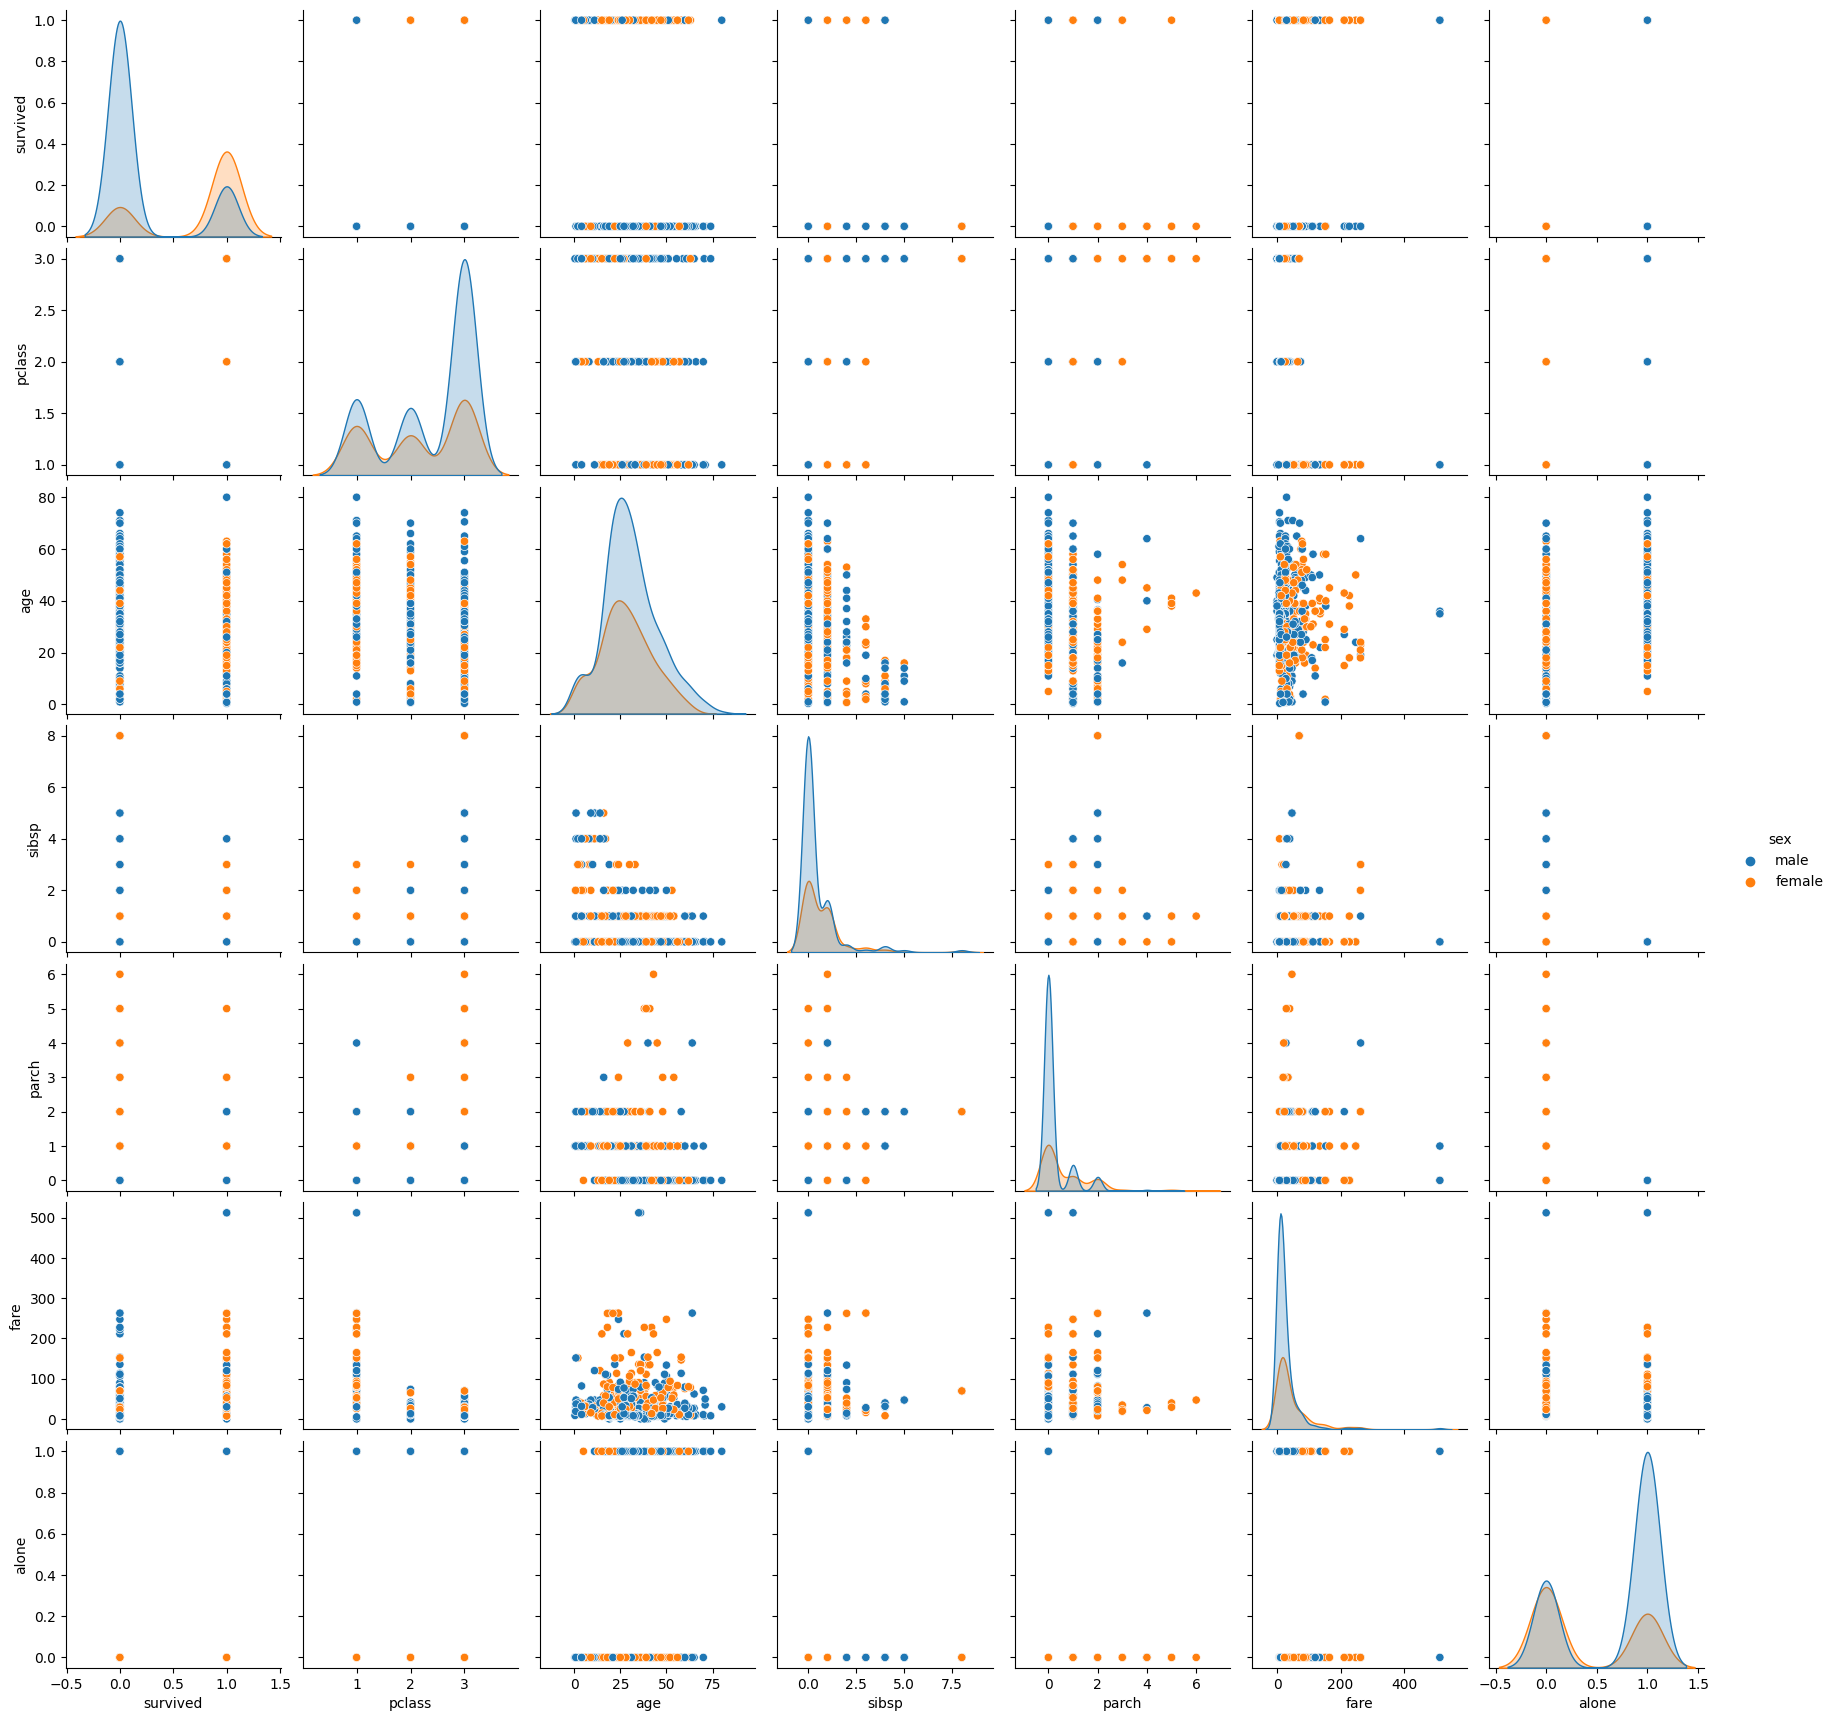

In [65]:
sns.pairplot(titanic, hue='sex')

From the pairplot and violin plot:

1. More women survived vs men.
2. More men survived from the 1st class, more women survived from 2nd and 3rd class.
3. There were more younger males who survived, vs younger women.